# Chapter 06: Working with Different Types of Data


This chapter covers building expressions, which are the bread and butter of Spark's strutured operations and also review working with variety of different kinds of data, including the following:

- Booleans
- Numbers
- Strings
- Dates and timestamps
- Handling null
- Complex types: arrays, maps, and structs
- User-defined types


## Import necessary libraries and initialize Spark session


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, instr, pow, round, bround, corr, initcap, lower, upper, ltrim, rtrim, trim, regexp_replace, regexp_extract, rpad, lpad, translate, locate, expr, current_date, current_timestamp

In [2]:
sparkSession = SparkSession.builder.master("local").appName("Chapter06").getOrCreate()
sparkSession.sparkContext.setLogLevel("ERROR")
sparkSession

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/12/09 19:34:55 WARN Utils: Your hostname, alex-mathew, resolves to a loopback address: 127.0.1.1; using 192.168.1.14 instead (on interface wlo1)
25/12/09 19:34:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/12/09 19:34:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Read the retail data into a DataFrame


In [3]:
df = sparkSession.read.format("csv").option("header", "true").option("inferSchema", "true").load("data/retails.csv")
df.printSchema()

root
 |-- InvoiceNo: integer (nullable = true)
 |-- StockCode: integer (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



## Coverting to Spark Types


Covert native types to Spark types using the `lit` function.


In [4]:
df.select(lit(5), lit("five"), lit(5.0), lit(True)).show()

+---+----+---+----+
|  5|five|5.0|true|
+---+----+---+----+
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
|  5|five|5.0|true|
+---+----+---+----+
only showing top 20 rows


## Working with Booleans


> Questions: Which transactions involve products whose Description contains the word 'BAG' and have revenue greater than 1.5?


### Conventional way


In [5]:
df.where(col("Description").contains("BAG") & (col("UnitPrice") * col("Quantity") > 1.5)).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH BAG BLACK S...|       4|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536388|    23084|  RECYCLING BAG BLUE|       6|2010-12-01 10:12:00|     1.95|     17850|United Kingdom|
|   536389|    23085| RECYCLING BAG GREEN|       6|2010-12-01 10:15:00|     1.95|     17850|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+



In [6]:
df.filter(col("Description").contains("BAG") & (col("UnitPrice") * col("Quantity") > 1.5)).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH BAG BLACK S...|       4|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536388|    23084|  RECYCLING BAG BLUE|       6|2010-12-01 10:12:00|     1.95|     17850|United Kingdom|
|   536389|    23085| RECYCLING BAG GREEN|       6|2010-12-01 10:15:00|     1.95|     17850|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+



### Define filter conditions separately


In [7]:
descriptionFilter = col("Description").contains("BAG")
revenueFilter = (col("UnitPrice") * col("Quantity")) > 1.5
df.where(descriptionFilter & revenueFilter).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH BAG BLACK S...|       4|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536388|    23084|  RECYCLING BAG BLUE|       6|2010-12-01 10:12:00|     1.95|     17850|United Kingdom|
|   536389|    23085| RECYCLING BAG GREEN|       6|2010-12-01 10:15:00|     1.95|     17850|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+



In [8]:
descriptionFilter = instr(col("Description"), "BAG") >= 1
revenueFilter = (col("UnitPrice") * col("Quantity")) > 1.5
df.filter(descriptionFilter & revenueFilter).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH BAG BLACK S...|       4|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536388|    23084|  RECYCLING BAG BLUE|       6|2010-12-01 10:12:00|     1.95|     17850|United Kingdom|
|   536389|    23085| RECYCLING BAG GREEN|       6|2010-12-01 10:15:00|     1.95|     17850|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+



## Working with Numbers


Let's imagine that we found out that we mis-recorded the quantity in our retail dataset and the true quantity is equal to `(the 
current quantity * the unit price)^2 + 5 `


In [9]:
correctQuantity = pow(col("Quantity") * col("UnitPrice"), 2) + 5
df.select("CustomerId", correctQuantity.alias("realQuantity")).show(2)

+----------+------------+
|CustomerId|realQuantity|
+----------+------------+
|     14911|       294.0|
|     14911|      552.56|
+----------+------------+
only showing top 2 rows


Another common numerical task is **rounding**


In [10]:
df.select(round(lit(2.5)).alias("Round up"), bround(lit(2.5)).alias("Round down")).show(5)

+--------+----------+
|Round up|Round down|
+--------+----------+
|     3.0|       2.0|
|     3.0|       2.0|
|     3.0|       2.0|
|     3.0|       2.0|
|     3.0|       2.0|
+--------+----------+
only showing top 5 rows


Another numerical task is to compute the **correlation** of two columns. We can use it to see if cheaper things are typically bought in greater quantities.


In [11]:
df.select(corr(col("Quantity"), col("UnitPrice"))).show()

+-------------------------+
|corr(Quantity, UnitPrice)|
+-------------------------+
|      -0.6196211329694905|
+-------------------------+



Another common task is to compute statistics for a column or set of columns. We can use `describe` method to achieve exactly this. This will take all numeric columns and calculate the **count**, **mean**, **standard deviation**, **min** and **max**.


In [12]:
df.describe().show()

+-------+-----------------+------------------+--------------------+-----------------+------------------+------------------+--------------+
|summary|        InvoiceNo|         StockCode|         Description|         Quantity|         UnitPrice|        CustomerID|       Country|
+-------+-----------------+------------------+--------------------+-----------------+------------------+------------------+--------------+
|  count|               35|                35|                  35|               35|                35|                35|            35|
|   mean|         536385.4|           25814.2|                NULL|6.714285714285714|3.6700000000000013|15056.314285714287|          NULL|
| stddev|8.626907291253694|14796.839342158413|                NULL|6.171907077621141| 2.571826999945187|1977.1051739620643|          NULL|
|    min|           536373|             20725|BLUE COAT RACK PA...|                1|              0.55|             12583|        France|
|    max|           536401|

## Working with Strings


String manipulation is a very common task when working with data. Let's look at some common string operations in Spark


---


`initcap` function will capitalize the first letter of each word in a string column.


In [13]:
df.select(initcap(col("Description"))).show(5, truncate=False)

+------------------------+
|initcap(Description)    |
+------------------------+
|Jam Making Set With Jars|
|Jam Jar With Pink Lid   |
|Home Building Block Word|
|Regency Cakestand 3 Tier|
|Ivory Knitted Scarf     |
+------------------------+
only showing top 5 rows


---

As jut mentioned earlier, `lower` and `upper` functions can be used to change the case of a string column.


In [14]:
df.select(col("Description"), lower(col("Description")).alias("lowered"), upper(col("Description")).alias("uppered")).show(5, truncate=False)

+------------------------+------------------------+------------------------+
|Description             |lowered                 |uppered                 |
+------------------------+------------------------+------------------------+
|JAM MAKING SET WITH JARS|jam making set with jars|JAM MAKING SET WITH JARS|
|JAM JAR WITH PINK LID   |jam jar with pink lid   |JAM JAR WITH PINK LID   |
|HOME BUILDING BLOCK WORD|home building block word|HOME BUILDING BLOCK WORD|
|REGENCY CAKESTAND 3 TIER|regency cakestand 3 tier|REGENCY CAKESTAND 3 TIER|
|IVORY KNITTED SCARF     |ivory knitted scarf     |IVORY KNITTED SCARF     |
+------------------------+------------------------+------------------------+
only showing top 5 rows


---

`ltrim`, `rtrim`, and `trim` functions can be used to remove leading, trailing, or both leading and trailing spaces from a string column.
`lpad` and `rpad` functions can be used to pad the left or right side of a string column to a specified length with a specified character. If the string is already longer than the specified length, it will be truncated always from the right side.


In [15]:
df.select(
    ltrim(lit("    Hello Spark   ")).alias("ltrimmed"),
    rtrim(lit("    Hello Spark   ")).alias("rtrimmed"),
    trim(lit("    Hello Spark   ")).alias("trimmed"),
    lpad(lit("Hello"), 10, "*").alias("lpadded"),
    rpad(lit("Hello"), 10, "*").alias("rpadded"),
    lpad(lit("HelloWorldSpark"), 10, "*").alias("lpadded_truncated"),
    rpad(lit("HelloWorldSpark"), 10, "*").alias("rpadded_truncated")
).show(5, truncate=False)

+--------------+---------------+-----------+----------+----------+-----------------+-----------------+
|ltrimmed      |rtrimmed       |trimmed    |lpadded   |rpadded   |lpadded_truncated|rpadded_truncated|
+--------------+---------------+-----------+----------+----------+-----------------+-----------------+
|Hello Spark   |    Hello Spark|Hello Spark|*****Hello|Hello*****|HelloWorld       |HelloWorld       |
|Hello Spark   |    Hello Spark|Hello Spark|*****Hello|Hello*****|HelloWorld       |HelloWorld       |
|Hello Spark   |    Hello Spark|Hello Spark|*****Hello|Hello*****|HelloWorld       |HelloWorld       |
|Hello Spark   |    Hello Spark|Hello Spark|*****Hello|Hello*****|HelloWorld       |HelloWorld       |
|Hello Spark   |    Hello Spark|Hello Spark|*****Hello|Hello*****|HelloWorld       |HelloWorld       |
+--------------+---------------+-----------+----------+----------+-----------------+-----------------+
only showing top 5 rows


---

### Regular Expressions


- Probaly one of the most frequently performed tasks is searching for the existence of one string in another or replacing all mentions of string with another value.
- Spark takes advantage of the complete power of Java regular expressions. The Java regular expression syntax departs from other programming languages.
- There are two key functions in Spark that need in order to perform expression taks: `regexp_replace` and `regexp_extract`.


In [16]:
regex_string = "BLACK|WHITE|RED|GREEN|BLUE"

df.select(
    regexp_replace(col("Description"), regex_string, "COLOR").alias("replace_colors"),
    col("Description")
).show(truncate=False)

+-----------------------------+-----------------------------+
|replace_colors               |Description                  |
+-----------------------------+-----------------------------+
|JAM MAKING SET WITH JARS     |JAM MAKING SET WITH JARS     |
|JAM JAR WITH PINK LID        |JAM JAR WITH PINK LID        |
|HOME BUILDING BLOCK WORD     |HOME BUILDING BLOCK WORD     |
|REGENCY CAKESTAND 3 TIER     |REGENCY CAKESTAND 3 TIER     |
|IVORY KNITTED SCARF          |IVORY KNITTED SCARF          |
|LUNCH BAG COLOR SPOTTY       |LUNCH BAG RED SPOTTY         |
|LUNCH BAG COLOR SKULL        |LUNCH BAG BLACK SKULL        |
|SILVER ROPE PHOTO FRAME      |SILVER ROPE PHOTO FRAME      |
|DOORSTOP RETROSPOT HEART     |DOORSTOP RETROSPOT HEART     |
|VINTAGE SNAP CARDS           |VINTAGE SNAP CARDS           |
|VINTAGE HEADS & TAILS GAME   |VINTAGE HEADS & TAILS GAME   |
|BREAD BIN DINER STYLE        |BREAD BIN DINER STYLE        |
|SUGAR STORAGE JAR            |SUGAR STORAGE JAR            |
|HEART B

In [17]:
df.select(
    regexp_extract(col("Description"), regex_string, 0).alias("extracted_color"),
    col("Description"),
).show(truncate=False)

+---------------+-----------------------------+
|extracted_color|Description                  |
+---------------+-----------------------------+
|               |JAM MAKING SET WITH JARS     |
|               |JAM JAR WITH PINK LID        |
|               |HOME BUILDING BLOCK WORD     |
|               |REGENCY CAKESTAND 3 TIER     |
|               |IVORY KNITTED SCARF          |
|RED            |LUNCH BAG RED SPOTTY         |
|BLACK          |LUNCH BAG BLACK SKULL        |
|               |SILVER ROPE PHOTO FRAME      |
|               |DOORSTOP RETROSPOT HEART     |
|               |VINTAGE SNAP CARDS           |
|               |VINTAGE HEADS & TAILS GAME   |
|               |BREAD BIN DINER STYLE        |
|               |SUGAR STORAGE JAR            |
|               |HEART BISCUIT CUTTERS SET 3  |
|BLUE           |BLUE COAT RACK PARIS FASHION |
|BLUE           |RETRO COFFEE MUG BLUE        |
|               |RETRO COFFEE MUG PINK        |
|               |DOORSTOP RABBIT        

`translate` function can be used to replace a set of characters in a string with another set of characters. It works on a character-by-character basis.


In [18]:
df.select(translate(col("Description"), "LEET", "1337").alias("translated"), col("Description")).show(truncate=False)

+-----------------------------+-----------------------------+
|translated                   |Description                  |
+-----------------------------+-----------------------------+
|JAM MAKING S37 WI7H JARS     |JAM MAKING SET WITH JARS     |
|JAM JAR WI7H PINK 1ID        |JAM JAR WITH PINK LID        |
|HOM3 BUI1DING B1OCK WORD     |HOME BUILDING BLOCK WORD     |
|R3G3NCY CAK3S7AND 3 7I3R     |REGENCY CAKESTAND 3 TIER     |
|IVORY KNI773D SCARF          |IVORY KNITTED SCARF          |
|1UNCH BAG R3D SPO77Y         |LUNCH BAG RED SPOTTY         |
|1UNCH BAG B1ACK SKU11        |LUNCH BAG BLACK SKULL        |
|SI1V3R ROP3 PHO7O FRAM3      |SILVER ROPE PHOTO FRAME      |
|DOORS7OP R37ROSPO7 H3AR7     |DOORSTOP RETROSPOT HEART     |
|VIN7AG3 SNAP CARDS           |VINTAGE SNAP CARDS           |
|VIN7AG3 H3ADS & 7AI1S GAM3   |VINTAGE HEADS & TAILS GAME   |
|BR3AD BIN DIN3R S7Y13        |BREAD BIN DINER STYLE        |
|SUGAR S7ORAG3 JAR            |SUGAR STORAGE JAR            |
|H3AR7 B

---

Sometimes we simply want to check for the existence rather than extracting or replacing. We can do this with the `contains` method on a column. This will return a boolean column indicating whether the string exists in the given column.


In [19]:
containsBlack = instr(col("Description"), "BLACK") >= 1
containsWhite = instr(col("Description"), "WHITE") >= 1
df.where(containsBlack | containsWhite).show(truncate=False)

+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description          |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+
|536376   |20726    |LUNCH BAG BLACK SKULL|4       |2010-12-01 09:25:00|1.65     |14911     |Netherlands   |
|536397   |21734    |WHITE STAR LANTERN   |6       |2010-12-01 10:45:00|3.25     |17850     |United Kingdom|
+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+



In [20]:
simple_colors = ["BLACK", "WHITE", "RED", "GREEN", "BLUE"]
def color_locator(column, color_string):
    return locate(color_string, column)\
    .cast("boolean")\
    .alias("is_" + color_string.lower())

selected_columns = [color_locator(col("Description"), color) for color in simple_colors]

selected_columns

[Column<'CAST(locate('BLACK', Description, 1) AS BOOLEAN) AS is_black'>,
 Column<'CAST(locate('WHITE', Description, 1) AS BOOLEAN) AS is_white'>,
 Column<'CAST(locate('RED', Description, 1) AS BOOLEAN) AS is_red'>,
 Column<'CAST(locate('GREEN', Description, 1) AS BOOLEAN) AS is_green'>,
 Column<'CAST(locate('BLUE', Description, 1) AS BOOLEAN) AS is_blue'>]

In [21]:
selected_columns.append(expr("*"))
selected_columns

[Column<'CAST(locate('BLACK', Description, 1) AS BOOLEAN) AS is_black'>,
 Column<'CAST(locate('WHITE', Description, 1) AS BOOLEAN) AS is_white'>,
 Column<'CAST(locate('RED', Description, 1) AS BOOLEAN) AS is_red'>,
 Column<'CAST(locate('GREEN', Description, 1) AS BOOLEAN) AS is_green'>,
 Column<'CAST(locate('BLUE', Description, 1) AS BOOLEAN) AS is_blue'>,
 Column<'*'>]

In [22]:
df.select(*selected_columns).where(expr("is_black OR is_white")).show(truncate=False)

+--------+--------+------+--------+-------+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+
|is_black|is_white|is_red|is_green|is_blue|InvoiceNo|StockCode|Description          |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+--------+--------+------+--------+-------+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+
|true    |false   |false |false   |false  |536376   |20726    |LUNCH BAG BLACK SKULL|4       |2010-12-01 09:25:00|1.65     |14911     |Netherlands   |
|false   |true    |false |false   |false  |536397   |21734    |WHITE STAR LANTERN   |6       |2010-12-01 10:45:00|3.25     |17850     |United Kingdom|
+--------+--------+------+--------+-------+---------+---------+---------------------+--------+-------------------+---------+----------+--------------+



---


## Working with Dates and Timestamps


In [23]:
from pyspark.sql.functions import date_add, date_sub, date_diff, months_between, to_date, to_timestamp

It's always necessary to keep track of time zones and ensure formats are valid. Spark focuses explicitly on two kinds of time-related information: dates and timestamps.

**Important Note: Time Zones in Spark**

> In version 2.1 and before, Spark parsed according to the machine's timezone if timezones are not explicitly speciffied in the value that you are parsing.
> We can set a session local timezone if necessary by setting `spark.conf.sessionLocalTimeZone`, this should be set according to the **Java TimeZone** format.


In [24]:
df.printSchema()

root
 |-- InvoiceNo: integer (nullable = true)
 |-- StockCode: integer (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



- Spark may parse dates/times but you must know their exact format; timestamps only keep seconds, so milliseconds/microseconds are lost, store extra precision as integers (longs) or handle them before converting.


In [25]:
date_datafame = sparkSession.range(10).withColumn("today", current_date()).withColumn("now", current_timestamp())
date_datafame.printSchema()

root
 |-- id: long (nullable = false)
 |-- today: date (nullable = false)
 |-- now: timestamp (nullable = false)



### Add and subtract days from a date


In [26]:
date_datafame.select(
    date_add(col("today"), 5).alias("today_plus_5"),
    date_sub(col("today"), 5).alias("today_minus_5"),
).show()

+------------+-------------+
|today_plus_5|today_minus_5|
+------------+-------------+
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
|  2025-12-14|   2025-12-04|
+------------+-------------+



### Difference between two dates


In [27]:
date_datafame.withColumn("week_ago", date_sub(col("today"), 7))\
    .select(date_diff(col("today"), col("week_ago")).alias("days_difference"))\
    .show()

+---------------+
|days_difference|
+---------------+
|              7|
|              7|
|              7|
|              7|
|              7|
|              7|
|              7|
|              7|
|              7|
|              7|
+---------------+



In [28]:
date_datafame.select(
    months_between(
        to_date(lit("2017-05-22")),
        to_date(lit("2016-01-01"))
    ).alias("months_between")
).show()

+--------------+
|months_between|
+--------------+
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
|   16.67741935|
+--------------+



> Notes: Spark will not throw an error if it cannot parse the date, rather it will return null. This can be tricky in larger pipelines because we might be expecting our data in one format and getting it in another.
>
> To illustrate, let’s take a look at the date format that has switched from year-month-day to year-day-month. Spark will fail to parse this date and silently return null instead:


In [29]:
date_datafame.select(to_date(lit("2017-12-31"), "yyyy-MM-dd").alias("bad_date")).show()

+----------+
|  bad_date|
+----------+
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
|2017-12-31|
+----------+



In [30]:
date_format = "yyyy-dd-MM"
cleanDateDF = sparkSession.range(1).select(
    to_date(lit("2017-12-11"), date_format).alias("date"),
    to_date(lit("2017-20-12"), date_format).alias("date2"),
)
cleanDateDF.show(truncate=False)

+----------+----------+
|date      |date2     |
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



Let's use an example of `to_timestamp` which accepts a date column and a date format.


In [31]:
cleanDateDF.select(to_timestamp(col("date"), date_format).alias("timestamp")).show(truncate=False)

+-------------------+
|timestamp          |
+-------------------+
|2017-11-12 00:00:00|
+-------------------+



**Important Notes**: Implicit type casting is an easy way to shoot yourself in the foot, especially when dealing with null values or dates in different time‐zones or formats. We recommend that you parse them explicitly instead of relying on implicit conversions.


## Working with Nulls in Data


As a best practice, we should always use nulls to represent missing or empty data in our Dataframes. Spark can optimize working with null values more than it can if we use empty strings or other values.

The primary way of interacting with nulls values, at Dataframe scale, is to use the `.na` subpackage on a Dataframe.

There are two things we can do with nulls: drop them or fill them.


### Coalesce


In [32]:
from pyspark.sql.functions import coalesce

Spark includes a function called `coalesce` that is useful for working with nulls. It accepts a list of columns and returns the first non-null value among them. This is useful when we have multiple columns that might have missing values, and we want to create a new column that takes the first available value from those columns.


In [33]:
# Ensure both columns share the same type to avoid Spark trying to cast Description to BIGINT.
# Cast CustomerId to string so coalesce works on two string columns.
df.select(coalesce(col("Description"), col("CustomerId").cast("string")).alias("coalesced")).show(truncate=False)

+-----------------------------+
|coalesced                    |
+-----------------------------+
|JAM MAKING SET WITH JARS     |
|JAM JAR WITH PINK LID        |
|HOME BUILDING BLOCK WORD     |
|REGENCY CAKESTAND 3 TIER     |
|IVORY KNITTED SCARF          |
|LUNCH BAG RED SPOTTY         |
|LUNCH BAG BLACK SKULL        |
|SILVER ROPE PHOTO FRAME      |
|DOORSTOP RETROSPOT HEART     |
|VINTAGE SNAP CARDS           |
|VINTAGE HEADS & TAILS GAME   |
|BREAD BIN DINER STYLE        |
|SUGAR STORAGE JAR            |
|HEART BISCUIT CUTTERS SET 3  |
|BLUE COAT RACK PARIS FASHION |
|RETRO COFFEE MUG BLUE        |
|RETRO COFFEE MUG PINK        |
|DOORSTOP RABBIT              |
|PACK OF 60 TEATIME CAKE CASES|
|RED RETROSPOT MINI CASE      |
+-----------------------------+
only showing top 20 rows


`drop` function can be used to remove rows with null values from a DataFrame. We can specify how we want to drop the rows using different options.


In [34]:
df.na.drop().show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536373|    22960|JAM MAKING SET WI...|       4|2010-12-01 09:12:00|     4.25|     14911|   Netherlands|
|   536373|    22961|JAM JAR WITH PINK...|      12|2010-12-01 09:12:00|     1.95|     14911|   Netherlands|
|   536374|    21754|HOME BUILDING BLO...|       3|2010-12-01 09:20:00|     5.95|     13047|United Kingdom|
|   536375|    22423|REGENCY CAKESTAND...|       1|2010-12-01 09:24:00|    12.75|     17850|United Kingdom|
|   536375|    22301| IVORY KNITTED SCARF|       2|2010-12-01 09:24:00|      7.5|     17850|United Kingdom|
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH B

In [35]:
df.na.drop("any").show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536373|    22960|JAM MAKING SET WI...|       4|2010-12-01 09:12:00|     4.25|     14911|   Netherlands|
|   536373|    22961|JAM JAR WITH PINK...|      12|2010-12-01 09:12:00|     1.95|     14911|   Netherlands|
|   536374|    21754|HOME BUILDING BLO...|       3|2010-12-01 09:20:00|     5.95|     13047|United Kingdom|
|   536375|    22423|REGENCY CAKESTAND...|       1|2010-12-01 09:24:00|    12.75|     17850|United Kingdom|
|   536375|    22301| IVORY KNITTED SCARF|       2|2010-12-01 09:24:00|      7.5|     17850|United Kingdom|
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH B

Specifying "any" will drop rows that have any null values in any column. Using "all" will drop rows only if all columns are null.


In [36]:
df.na.drop("all").show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536373|    22960|JAM MAKING SET WI...|       4|2010-12-01 09:12:00|     4.25|     14911|   Netherlands|
|   536373|    22961|JAM JAR WITH PINK...|      12|2010-12-01 09:12:00|     1.95|     14911|   Netherlands|
|   536374|    21754|HOME BUILDING BLO...|       3|2010-12-01 09:20:00|     5.95|     13047|United Kingdom|
|   536375|    22423|REGENCY CAKESTAND...|       1|2010-12-01 09:24:00|    12.75|     17850|United Kingdom|
|   536375|    22301| IVORY KNITTED SCARF|       2|2010-12-01 09:24:00|      7.5|     17850|United Kingdom|
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH B

`fill` function can be used to replace null values with a specified value. We can provide a single value to replace all nulls or a dictionary to specify different replacement values for different columns.


To fill all null values in columns of type String, we might specify:


In [37]:
df.na.fill("No Value").show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536373|    22960|JAM MAKING SET WI...|       4|2010-12-01 09:12:00|     4.25|     14911|   Netherlands|
|   536373|    22961|JAM JAR WITH PINK...|      12|2010-12-01 09:12:00|     1.95|     14911|   Netherlands|
|   536374|    21754|HOME BUILDING BLO...|       3|2010-12-01 09:20:00|     5.95|     13047|United Kingdom|
|   536375|    22423|REGENCY CAKESTAND...|       1|2010-12-01 09:24:00|    12.75|     17850|United Kingdom|
|   536375|    22301| IVORY KNITTED SCARF|       2|2010-12-01 09:24:00|      7.5|     17850|United Kingdom|
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH B

We can also provide a dictionary to specify different replacement values for different columns. For example, to fill nulls in the "Description" column with "No Value" and in the "CustomerId" column with -1, we can do the following:


In [38]:
fill_cols_vals = {"Description": "No Value", "CustomerId": -1}
df.na.fill(fill_cols_vals).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536373|    22960|JAM MAKING SET WI...|       4|2010-12-01 09:12:00|     4.25|     14911|   Netherlands|
|   536373|    22961|JAM JAR WITH PINK...|      12|2010-12-01 09:12:00|     1.95|     14911|   Netherlands|
|   536374|    21754|HOME BUILDING BLO...|       3|2010-12-01 09:20:00|     5.95|     13047|United Kingdom|
|   536375|    22423|REGENCY CAKESTAND...|       1|2010-12-01 09:24:00|    12.75|     17850|United Kingdom|
|   536375|    22301| IVORY KNITTED SCARF|       2|2010-12-01 09:24:00|      7.5|     17850|United Kingdom|
|   536376|    20725|LUNCH BAG RED SPOTTY|       6|2010-12-01 09:25:00|     1.65|     14911|   Netherlands|
|   536376|    20726|LUNCH B

## Working with Complex Types


In [39]:
from pyspark.sql.functions import struct

Complex types in Spark include **arrays**, **maps**, and **structs**. These types allow us to work with nested data structures and perform operations on them.


### Structs


We can think of structs as a way to group multiple columns into a single column. This is useful when we want to treat a set of related columns as a single entity.


In [40]:
complex_df = df.select(struct(col("Description"), col("InvoiceNo")).alias("complex"))

In [41]:
complex_df.show(truncate=False)

+---------------------------------------+
|complex                                |
+---------------------------------------+
|{JAM MAKING SET WITH JARS, 536373}     |
|{JAM JAR WITH PINK LID, 536373}        |
|{HOME BUILDING BLOCK WORD, 536374}     |
|{REGENCY CAKESTAND 3 TIER, 536375}     |
|{IVORY KNITTED SCARF, 536375}          |
|{LUNCH BAG RED SPOTTY, 536376}         |
|{LUNCH BAG BLACK SKULL, 536376}        |
|{SILVER ROPE PHOTO FRAME, 536377}      |
|{DOORSTOP RETROSPOT HEART, 536378}     |
|{VINTAGE SNAP CARDS, 536379}           |
|{VINTAGE HEADS & TAILS GAME, 536379}   |
|{BREAD BIN DINER STYLE, 536380}        |
|{SUGAR STORAGE JAR, 536380}            |
|{HEART BISCUIT CUTTERS SET 3, 536381}  |
|{BLUE COAT RACK PARIS FASHION, 536382} |
|{RETRO COFFEE MUG BLUE, 536383}        |
|{RETRO COFFEE MUG PINK, 536383}        |
|{DOORSTOP RABBIT, 536384}              |
|{PACK OF 60 TEATIME CAKE CASES, 536385}|
|{RED RETROSPOT MINI CASE, 536386}      |
+---------------------------------

In [42]:
complex_df.select("complex.Description").show(truncate=False)

+-----------------------------+
|Description                  |
+-----------------------------+
|JAM MAKING SET WITH JARS     |
|JAM JAR WITH PINK LID        |
|HOME BUILDING BLOCK WORD     |
|REGENCY CAKESTAND 3 TIER     |
|IVORY KNITTED SCARF          |
|LUNCH BAG RED SPOTTY         |
|LUNCH BAG BLACK SKULL        |
|SILVER ROPE PHOTO FRAME      |
|DOORSTOP RETROSPOT HEART     |
|VINTAGE SNAP CARDS           |
|VINTAGE HEADS & TAILS GAME   |
|BREAD BIN DINER STYLE        |
|SUGAR STORAGE JAR            |
|HEART BISCUIT CUTTERS SET 3  |
|BLUE COAT RACK PARIS FASHION |
|RETRO COFFEE MUG BLUE        |
|RETRO COFFEE MUG PINK        |
|DOORSTOP RABBIT              |
|PACK OF 60 TEATIME CAKE CASES|
|RED RETROSPOT MINI CASE      |
+-----------------------------+
only showing top 20 rows


In [43]:
complex_df.select("complex.*").show(truncate=False)

+-----------------------------+---------+
|Description                  |InvoiceNo|
+-----------------------------+---------+
|JAM MAKING SET WITH JARS     |536373   |
|JAM JAR WITH PINK LID        |536373   |
|HOME BUILDING BLOCK WORD     |536374   |
|REGENCY CAKESTAND 3 TIER     |536375   |
|IVORY KNITTED SCARF          |536375   |
|LUNCH BAG RED SPOTTY         |536376   |
|LUNCH BAG BLACK SKULL        |536376   |
|SILVER ROPE PHOTO FRAME      |536377   |
|DOORSTOP RETROSPOT HEART     |536378   |
|VINTAGE SNAP CARDS           |536379   |
|VINTAGE HEADS & TAILS GAME   |536379   |
|BREAD BIN DINER STYLE        |536380   |
|SUGAR STORAGE JAR            |536380   |
|HEART BISCUIT CUTTERS SET 3  |536381   |
|BLUE COAT RACK PARIS FASHION |536382   |
|RETRO COFFEE MUG BLUE        |536383   |
|RETRO COFFEE MUG PINK        |536383   |
|DOORSTOP RABBIT              |536384   |
|PACK OF 60 TEATIME CAKE CASES|536385   |
|RED RETROSPOT MINI CASE      |536386   |
+-----------------------------+---

### Arrays


In [44]:
from pyspark.sql.functions import split, size, array_contains

To define arrays, let's walk through an example. With our current data, our objectives is to take every single word in our Description column and convert that into a row in our dataframe.


In [45]:
desc_splitted_df = df.select(split(col("Description"), " " ).alias("Description_Split"))

In [46]:
# Query the values of the array using Python-like syntax:
desc_splitted_df.select(col("Description_Split").getItem(0).alias("first_word")).show(truncate=False)

+----------+
|first_word|
+----------+
|JAM       |
|JAM       |
|HOME      |
|REGENCY   |
|IVORY     |
|LUNCH     |
|LUNCH     |
|SILVER    |
|DOORSTOP  |
|VINTAGE   |
|VINTAGE   |
|BREAD     |
|SUGAR     |
|HEART     |
|BLUE      |
|RETRO     |
|RETRO     |
|DOORSTOP  |
|PACK      |
|RED       |
+----------+
only showing top 20 rows


We can determine the array's length using the `size` function:


In [47]:
desc_splitted_df.select(size(col("Description_Split")).alias("array_size")).show(truncate=False)

+----------+
|array_size|
+----------+
|5         |
|5         |
|4         |
|4         |
|3         |
|4         |
|4         |
|4         |
|3         |
|3         |
|5         |
|4         |
|3         |
|5         |
|5         |
|4         |
|4         |
|2         |
|6         |
|4         |
+----------+
only showing top 20 rows


`array_contains` function can be used to check if an array contains a specific value. It returns a boolean column indicating whether the value exists in the array.


In [48]:
desc_splitted_df.select(array_contains(col("Description_Split"), "WHITE").alias("contains_white")).filter(col("contains_white") == True).show(truncate=False)

+--------------+
|contains_white|
+--------------+
|true          |
+--------------+



`explode` function can be used to transform an array column into multiple rows, one for each element in the array. This is useful when we want to flatten an array into individual rows.


In [49]:
from pyspark.sql.functions import explode

In [50]:
df.withColumn("splitted", split(col("Description"), " "))\
    .withColumn("exploded", explode(col("splitted")))\
    .select("Description", "InvoiceNo", "exploded")\
    .show(truncate=False)

+------------------------+---------+---------+
|Description             |InvoiceNo|exploded |
+------------------------+---------+---------+
|JAM MAKING SET WITH JARS|536373   |JAM      |
|JAM MAKING SET WITH JARS|536373   |MAKING   |
|JAM MAKING SET WITH JARS|536373   |SET      |
|JAM MAKING SET WITH JARS|536373   |WITH     |
|JAM MAKING SET WITH JARS|536373   |JARS     |
|JAM JAR WITH PINK LID   |536373   |JAM      |
|JAM JAR WITH PINK LID   |536373   |JAR      |
|JAM JAR WITH PINK LID   |536373   |WITH     |
|JAM JAR WITH PINK LID   |536373   |PINK     |
|JAM JAR WITH PINK LID   |536373   |LID      |
|HOME BUILDING BLOCK WORD|536374   |HOME     |
|HOME BUILDING BLOCK WORD|536374   |BUILDING |
|HOME BUILDING BLOCK WORD|536374   |BLOCK    |
|HOME BUILDING BLOCK WORD|536374   |WORD     |
|REGENCY CAKESTAND 3 TIER|536375   |REGENCY  |
|REGENCY CAKESTAND 3 TIER|536375   |CAKESTAND|
|REGENCY CAKESTAND 3 TIER|536375   |3        |
|REGENCY CAKESTAND 3 TIER|536375   |TIER     |
|IVORY KNITTE

### Maps


In [51]:
from pyspark.sql.functions import create_map

Maps are another complex type in Spark that allow us to store key-value pairs. This is useful when we want to represent data that has a dynamic set of attributes.


In [52]:
df.select(create_map(col("Description"), col("InvoiceNo")).alias("description_invoice_map")).show(truncate=False)

+-----------------------------------------+
|description_invoice_map                  |
+-----------------------------------------+
|{JAM MAKING SET WITH JARS -> 536373}     |
|{JAM JAR WITH PINK LID -> 536373}        |
|{HOME BUILDING BLOCK WORD -> 536374}     |
|{REGENCY CAKESTAND 3 TIER -> 536375}     |
|{IVORY KNITTED SCARF -> 536375}          |
|{LUNCH BAG RED SPOTTY -> 536376}         |
|{LUNCH BAG BLACK SKULL -> 536376}        |
|{SILVER ROPE PHOTO FRAME -> 536377}      |
|{DOORSTOP RETROSPOT HEART -> 536378}     |
|{VINTAGE SNAP CARDS -> 536379}           |
|{VINTAGE HEADS & TAILS GAME -> 536379}   |
|{BREAD BIN DINER STYLE -> 536380}        |
|{SUGAR STORAGE JAR -> 536380}            |
|{HEART BISCUIT CUTTERS SET 3 -> 536381}  |
|{BLUE COAT RACK PARIS FASHION -> 536382} |
|{RETRO COFFEE MUG BLUE -> 536383}        |
|{RETRO COFFEE MUG PINK -> 536383}        |
|{DOORSTOP RABBIT -> 536384}              |
|{PACK OF 60 TEATIME CAKE CASES -> 536385}|
|{RED RETROSPOT MINI CASE -> 536

In [53]:
df.select(create_map(col("Description"), col("InvoiceNo")).alias("description_invoice_map"))\
    .selectExpr("description_invoice_map['JAM MAKING SET WITH JARS'] as invoice_no")\
    .show(2)

+----------+
|invoice_no|
+----------+
|    536373|
|      NULL|
+----------+
only showing top 2 rows


We can also `explode` **map types**, which will turn them into **columns**.


In [54]:
df.select(create_map(col("Description"), col("InvoiceNo")).alias("description_invoice_map")).selectExpr("explode(description_invoice_map) as (description, invoice_no)").show(truncate=False)

+-----------------------------+----------+
|description                  |invoice_no|
+-----------------------------+----------+
|JAM MAKING SET WITH JARS     |536373    |
|JAM JAR WITH PINK LID        |536373    |
|HOME BUILDING BLOCK WORD     |536374    |
|REGENCY CAKESTAND 3 TIER     |536375    |
|IVORY KNITTED SCARF          |536375    |
|LUNCH BAG RED SPOTTY         |536376    |
|LUNCH BAG BLACK SKULL        |536376    |
|SILVER ROPE PHOTO FRAME      |536377    |
|DOORSTOP RETROSPOT HEART     |536378    |
|VINTAGE SNAP CARDS           |536379    |
|VINTAGE HEADS & TAILS GAME   |536379    |
|BREAD BIN DINER STYLE        |536380    |
|SUGAR STORAGE JAR            |536380    |
|HEART BISCUIT CUTTERS SET 3  |536381    |
|BLUE COAT RACK PARIS FASHION |536382    |
|RETRO COFFEE MUG BLUE        |536383    |
|RETRO COFFEE MUG PINK        |536383    |
|DOORSTOP RABBIT              |536384    |
|PACK OF 60 TEATIME CAKE CASES|536385    |
|RED RETROSPOT MINI CASE      |536386    |
+----------

## Working with JSON


In [55]:
from pyspark.sql.functions import get_json_object, json_tuple, struct, to_json, from_json
from pyspark.sql.types import StructType, StructField, StringType

We can operate directly on strings of JSON and parse from JSON or extract JSON objects.


In [56]:
json_df = sparkSession.range(1).selectExpr("""'{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}' as jsonString""")

Use `get_json_object` to inline query a JSON object, be it a dictionary or array

In [57]:
json_df.show(truncate=False)

+-------------------------------------------+
|jsonString                                 |
+-------------------------------------------+
|{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}|
+-------------------------------------------+



In [58]:
# direct (works already)
json_df.select(get_json_object(col("jsonString"), "$.myJSONKey.myJSONValue[1]").alias("json_value")).show()

+----------+
|json_value|
+----------+
|         2|
+----------+



In [59]:
json_data = [
    ("1", '{"f1": "value1", "f2": "value2"}'),
    ("2", '{"f1": "value12"}')
]
json_df = sparkSession.createDataFrame(json_data, ["id", "jsonString"])
# json_tuple returns multiple columns; use selectExpr to alias each output column separately
json_df.selectExpr("id", "json_tuple(jsonString, 'f1', 'f2') as (f1, f2)").show()

+---+-------+------+
| id|     f1|    f2|
+---+-------+------+
|  1| value1|value2|
|  2|value12|  NULL|
+---+-------+------+



In [60]:
df.select(struct(col("InvoiceNo"), col("Description")).alias("complex_struct")).select(to_json(col("complex_struct")).alias("struct_to_json")).show(truncate=False )

+------------------------------------------------------------------+
|struct_to_json                                                    |
+------------------------------------------------------------------+
|{"InvoiceNo":536373,"Description":"JAM MAKING SET WITH JARS"}     |
|{"InvoiceNo":536373,"Description":"JAM JAR WITH PINK LID"}        |
|{"InvoiceNo":536374,"Description":"HOME BUILDING BLOCK WORD"}     |
|{"InvoiceNo":536375,"Description":"REGENCY CAKESTAND 3 TIER"}     |
|{"InvoiceNo":536375,"Description":"IVORY KNITTED SCARF"}          |
|{"InvoiceNo":536376,"Description":"LUNCH BAG RED SPOTTY"}         |
|{"InvoiceNo":536376,"Description":"LUNCH BAG BLACK SKULL"}        |
|{"InvoiceNo":536377,"Description":"SILVER ROPE PHOTO FRAME"}      |
|{"InvoiceNo":536378,"Description":"DOORSTOP RETROSPOT HEART"}     |
|{"InvoiceNo":536379,"Description":"VINTAGE SNAP CARDS"}           |
|{"InvoiceNo":536379,"Description":"VINTAGE HEADS & TAILS GAME"}   |
|{"InvoiceNo":536380,"Description"

We can use the `from_json` to parse the JSON into struct

In [61]:
parse_schema = StructType([
    StructField("InvoiceNo", StringType(), True),
    StructField("Description", StringType(), True)
])
df.select(struct(col("InvoiceNo"), col("Description")).alias("complex_struct")).select(to_json(col("complex_struct")).alias("struct_to_json")).select(from_json(col("struct_to_json"), parse_schema)).show(truncate=False )

+---------------------------------------+
|from_json(struct_to_json)              |
+---------------------------------------+
|{536373, JAM MAKING SET WITH JARS}     |
|{536373, JAM JAR WITH PINK LID}        |
|{536374, HOME BUILDING BLOCK WORD}     |
|{536375, REGENCY CAKESTAND 3 TIER}     |
|{536375, IVORY KNITTED SCARF}          |
|{536376, LUNCH BAG RED SPOTTY}         |
|{536376, LUNCH BAG BLACK SKULL}        |
|{536377, SILVER ROPE PHOTO FRAME}      |
|{536378, DOORSTOP RETROSPOT HEART}     |
|{536379, VINTAGE SNAP CARDS}           |
|{536379, VINTAGE HEADS & TAILS GAME}   |
|{536380, BREAD BIN DINER STYLE}        |
|{536380, SUGAR STORAGE JAR}            |
|{536381, HEART BISCUIT CUTTERS SET 3}  |
|{536382, BLUE COAT RACK PARIS FASHION} |
|{536383, RETRO COFFEE MUG BLUE}        |
|{536383, RETRO COFFEE MUG PINK}        |
|{536384, DOORSTOP RABBIT}              |
|{536385, PACK OF 60 TEATIME CAKE CASES}|
|{536386, RED RETROSPOT MINI CASE}      |
+---------------------------------

## User-Defined Functions

- The user-defined functions (UDF) make it possible for us to write our custom transformations using Python or Scala and even use external libraries. 
- UDFs can take and return on or more columns as input. 
- Although we can write UDFs, there are performance considerations that we should be aware of. 
- We need to register them with Spark so that we can use them on all of our worker machines. Spark will serialize the function on the driver and transfer it over the network to all executor processes. This happens regardless of language.

### UDF in Scala/Java

If the function is written in Scala or Java , we can use it within the JVM. This means that there will be little performance penalty aside from the fact that we cant take advantage of code generation capabilities that Spark has for built-in functions. There can be performance issues if we create or use a lot of objects. 

### UDF in Python

If the function is written in Python, something quite different happens. Spark starts a **Python process** on the worker, serializes all the data to a format that Python can understand (remember it was in the JVM earlier), execute the function row by row on that data in the Python process and then finally returns the results of the row operations to the JVM and Spark. 

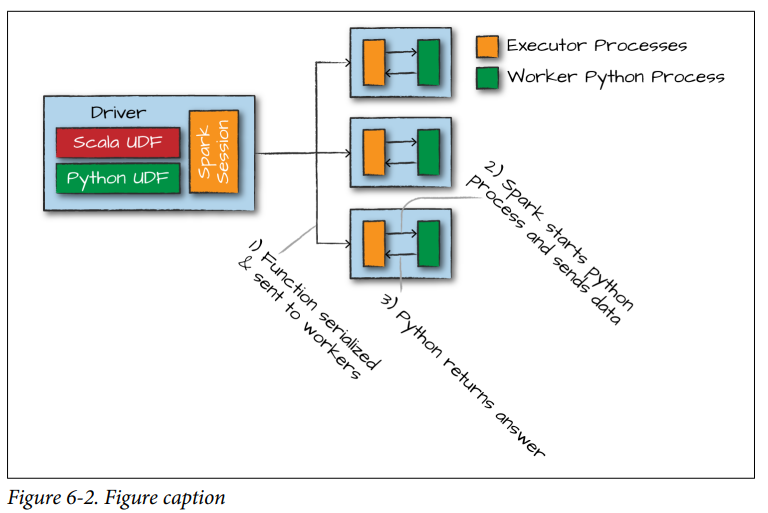

> **Important Notes:**
> Starting this Python process is expensive, but the real cost is in seri‐alizing the data to Python. This is costly for two reasons: it is an expensive computation, but also, after the data enters Python, Spark cannot manage the memory of the worker. This means that you could potentially cause a worker to fail if it becomes resource constrained (because both the JVM and Python are competing for memory on the same machine). We recommend that you write your UDFs in Scala or Java—the small amount of time it should take you to write the function in Scala will always yield significant speed ups, and on top of that, you can still use the function from Python!

In [62]:
from pyspark.sql.functions import udf

In [63]:
udf_example_df = sparkSession.range(5).toDF("num")
def power3(number):
    return number ** 3
power3_udf = udf(power3)
udf_example_df.select(power3_udf(col("num")).alias("num_power3")).show()


+----------+
|num_power3|
+----------+
|         0|
|         1|
|         8|
|        27|
|        64|
+----------+

